## Inversão da abertura

### O sinal é dado no rompimento da abertura do dia anterior

In [36]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
symbols = ['EURUSD','GBPUSD','USDCHF','USDJPY','USDCAD']

timeframe = 'D1'

df = pd.read_csv("data/"+ symbols[0]+ timeframe+ ".csv")
df = df[['Date','Open','High','Low','Close']]
df['Date'] = pd.to_datetime(df['Date'])
df['Return'] = (df['Close'] - df['Open']) *100000
df['Returnshift'] = df['Return'].shift(1)
df['Openshift'] = df['Open'].shift(1)


df

,Date,Open,High,Low,Close,Return,Returnshift,Openshift
0,2013-01-01,1.32036,1.32192,1.31977,1.32053,17.0,NaN,NaN
1,2013-01-02,1.32049,1.32992,1.31567,1.31888,-161.0,17.0,1.32036
2,2013-01-03,1.31889,1.31889,1.30246,1.30366,-1523.0,-161.0,1.32049
3,2013-01-04,1.30364,1.30884,1.29975,1.30677,313.0,-1523.0,1.31889
4,2013-01-07,1.30779,1.31276,1.30165,1.31252,473.0,313.0,1.30364
...,...,...,...,...,...,...,...,...
1573,2019-01-25,1.13037,1.14176,1.12998,1.14055,1018.0,-737.0,1.13811
1574,2019-01-28,1.14003,1.14437,1.13901,1.14257,254.0,1018.0,1.13037
1575,2019-01-29,1.14270,1.14502,1.14112,1.14319,49.0,254.0,1.14003
1576,2019-01-30,1.14322,1.15017,1.14061,1.14793,471.0,49.0,1.14270


In [59]:
cond = [[(df['Returnshift'] < 0) & (df['High'] > df['Openshift'])], [(df['Returnshift'] >= 0) & (df['Low'] < df['Openshift'])]]

choice = [[df['Close'] - df['Openshift']], [df['Openshift'] - df['Close']]]

df['Bull'] = np.select(cond[1],choice[1], default=0) * 100000

df['Bear'] = np.select(cond[1],choice[1], default=0) * 100000

df['ResultCum'] = np.cumsum(df['Bull'] + df['Bear']) 

df.dropna(inplace=True)

df.head()

,Date,Open,High,Low,Close,Return,Returnshift,Openshift,Bull,Bear,ResultCum
1,2013-01-02,1.32049,1.32992,1.31567,1.31888,-161.0,17.0,1.32036,148.0,148.0,296.0
2,2013-01-03,1.31889,1.31889,1.30246,1.30366,-1523.0,-161.0,1.32049,0.0,0.0,296.0
3,2013-01-04,1.30364,1.30884,1.29975,1.30677,313.0,-1523.0,1.31889,0.0,0.0,296.0
4,2013-01-07,1.30779,1.31276,1.30165,1.31252,473.0,313.0,1.30364,-888.0,-888.0,-1480.0
5,2013-01-08,1.31253,1.31388,1.30569,1.30802,-451.0,473.0,1.30779,-23.0,-23.0,-1526.0


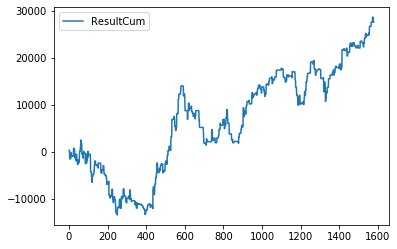

In [60]:
df.plot( y='ResultCum', kind = 'line')
plt.show()